<a href="https://colab.research.google.com/github/Devanandini04/Deep-Geo-Lab/blob/main/Works_Kaggle/Churn_Predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print(df.shape)


(10000, 14)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [8]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype=int)

In [12]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [13]:
X=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [14]:
X


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [15]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [17]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [18]:
X_test_scaled

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [19]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [23]:
his=model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5428 - loss: 0.6873 - val_accuracy: 0.7975 - val_loss: 0.5024
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7940 - loss: 0.4844 - val_accuracy: 0.7975 - val_loss: 0.4628
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7918 - loss: 0.4653 - val_accuracy: 0.7969 - val_loss: 0.4413
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7974 - loss: 0.4358 - val_accuracy: 0.8069 - val_loss: 0.4246
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8150 - loss: 0.4133 - val_accuracy: 0.8219 - val_loss: 0.4076
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8322 - loss: 0.3974 - val_accuracy: 0.8363 - val_loss: 0.3895
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8365 - loss: 0.3901 - val_accuracy: 0.8419 - val_loss: 0.3738
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8466 - loss: 0.3762 - val_accuracy: 0.

In [24]:
model.layers[0].get_weights()

[array([[ 1.16988095e-02, -2.96521991e-01,  2.49485224e-01,
          1.90981049e-02, -1.30353635e-02,  2.42646962e-01,
         -3.07661295e-01,  2.67263293e-01, -3.04679852e-02,
         -3.21889043e-01, -3.97777140e-01],
        [-2.56846130e-01, -2.35557500e-02, -4.70683932e-01,
         -8.53175759e-01,  2.57406801e-01,  3.52771282e-01,
         -8.35051179e-01, -7.52691150e-01,  8.34118605e-01,
          1.51253477e-01, -9.64768946e-01],
        [-1.69116139e-01, -1.73713788e-02, -5.95474541e-01,
          1.14228139e-02, -5.13135679e-02,  1.56631872e-01,
          1.20801546e-01, -5.55058010e-02,  2.93383420e-01,
         -3.66462350e-01,  4.22690034e-01],
        [ 6.48523569e-01, -4.45837259e-01,  2.92799361e-02,
         -8.19107890e-02,  4.40182567e-01,  9.57779810e-02,
          3.27444136e-01, -4.20260848e-03, -1.01128146e-02,
          1.81372955e-01,  3.00851375e-01],
        [-3.04686148e-02, -5.52076638e-01,  7.51135290e-01,
          1.23306565e-01,  1.10624886e+00, -

In [25]:
model.layers[1].get_weights()

[array([[ 5.42908192e-01,  2.97738850e-01, -5.28108954e-01,
         -7.43916094e-01, -3.69594544e-02, -2.22913921e-01,
          1.48048192e-01,  3.42876196e-01,  5.25352597e-01,
          3.04227434e-02, -4.72343922e-01],
        [ 3.21119159e-01,  3.97715755e-02, -1.59473658e-01,
          4.53777313e-01, -5.88312328e-01,  4.10322666e-01,
          8.04834664e-01, -1.81723371e-01,  3.05561069e-03,
         -1.35097295e-01, -3.79639596e-01],
        [ 6.64391462e-03,  5.40715456e-01,  3.32096398e-01,
          2.96828486e-02, -2.71887537e-02, -2.86843330e-02,
         -8.24597061e-01,  2.35241763e-02,  6.26636893e-02,
          5.27519286e-01,  5.64660132e-01],
        [-6.40418082e-02, -8.28423873e-02,  9.30057541e-02,
         -6.34523809e-01,  6.44407511e-01, -1.35986239e-01,
         -1.09969556e+00,  1.57064945e-01, -5.83819568e-01,
          4.56485838e-01,  4.51619893e-01],
        [-3.27167064e-01, -6.09246373e-01,  6.42746449e-01,
          1.00399815e-01, -5.38378835e-01,  

In [26]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [27]:
y_pred=np.where(y_log>0.5,1,0)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.862

In [29]:
import matplotlib.pyplot as plt

In [30]:
his.history

{'accuracy': [0.6931250095367432,
  0.7971875071525574,
  0.7971875071525574,
  0.8014062643051147,
  0.8162500262260437,
  0.8332812786102295,
  0.8448437452316284,
  0.8500000238418579,
  0.8521875143051147,
  0.8557812571525574,
  0.8565624952316284,
  0.8571875095367432,
  0.8567187786102295,
  0.8590624928474426,
  0.8590624928474426,
  0.8587499856948853,
  0.859375,
  0.8603125214576721,
  0.8581249713897705,
  0.8610937595367432,
  0.8609374761581421,
  0.8620312213897705,
  0.8612499833106995,
  0.8618749976158142,
  0.8614062666893005,
  0.8631250262260437,
  0.8637499809265137,
  0.8607812523841858,
  0.862500011920929,
  0.8626562356948853,
  0.8626562356948853,
  0.8643749952316284,
  0.86328125,
  0.8631250262260437,
  0.8653125166893005,
  0.8646875023841858,
  0.8648437261581421,
  0.8643749952316284,
  0.8643749952316284,
  0.8634374737739563,
  0.8646875023841858,
  0.8648437261581421,
  0.8653125166893005,
  0.8643749952316284,
  0.8648437261581421,
  0.8637499809265

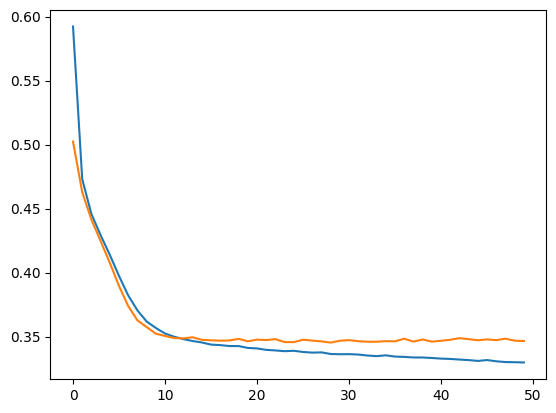

In [31]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])

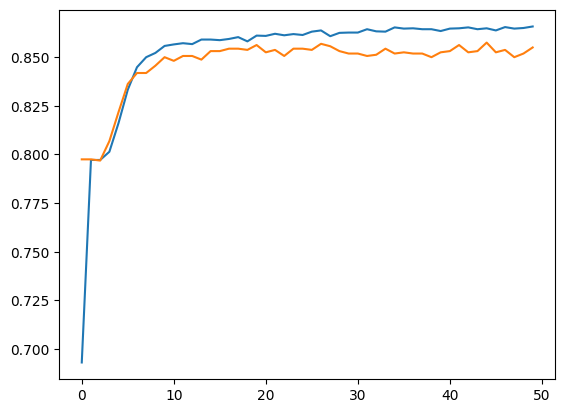

In [32]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])